## Цели и задачи исследования


- Задача № 1. Рассчитать усредненный Retention Rate по всем когортам июня 2019 г., построить график изменения Retention Rate и сделать выводы на основе графика.
- Задача № 2. Расчитать ARPU и построить сводную таблицу изменения ARPU по когортам июня 2019 г. в зависимости от времени жизни.
- Задача № 3. Построить график по ARPU по когортам июня 2019 в нулевой день жизни и описать выводы.
- Задача № 4. Рассчитать усредненный ARPU по всем когортам июня 2019 г., построить график изменения ARPU и сделать выводы на основе графика.

## Получение данных и их первичный анализ

### Импорт библиотек и получение данных для анализа

In [1]:
# Импортируем библиотеки для работы
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Для проведения анализа необходимо вначале получить данные, которые хранятся в БД.

Данные для проведения анализа хранятся в трех файлах.

1. Файл **RegisteredUsersCount.csv** содержит данные по количеству пользователей, которые зарегистрировались в каждый день июня 2019 г.

In [2]:
registered_users_count_june = pd.read_csv('RegisteredUsersCount.csv')

2. Файл **ActiveUsersCountWithCohorts.csv** содержит данные об активных пользователях из базы и подсчитает по дням количество активных пользователей `active_users_count` с указанием даты регистрации `registration_date`. Дата регистрации будет выступать когортой.

In [3]:
active_users_count_with_cohorts_june = pd.read_csv('ActiveUsersCountWithCohorts.csv')

3. Файл **Revenue()** содержит данные о выручке по дням в разрезе когорт, для пользователей, зарегистрировавшихся в июне 2019 г. 

In [4]:
revenue_june = pd.read_csv('revenue.csv')

### Первичный анализ полученных данных

#### Датафрейм с данными по количеству пользователей (registered_users_count_june)

Воспользуемся методом `info()` для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)

In [5]:
registered_users_count_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   registration_date       30 non-null     object
 1   registered_users_count  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


Датафрейм состоит из 30 строк и 2-х столбцов. Рассмотрим каждый столбец подробнее:

- столбец **"registration_date"** (дата регистрации) имеет тип данных "`object`" (строковый тип);
- столбец **"registered_users_count"** (количество зарегистрированных пользователей) имеет тип данных "`int64`"

Пропущенные значения в датафрейме отсутствуют. Это значит, что для каждой строки в каждом столбце присутствует значение.

Преобразуем столбец **"registration_date"** в тип `datetime` с помощью метода `pd.to_datetime()`:

In [6]:
registered_users_count_june['registration_date'] = pd.to_datetime(registered_users_count_june['registration_date'])

Выведем первые пять строк датафрейма:

In [7]:
registered_users_count_june.head(5)

,registration_date,registered_users_count
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


Посчитаем общее количество зарегистрированных пользователей в июне 2019 г.

In [8]:
registered_users_count_june['registered_users_count'].sum()

100423

#### Датафрейм с данными об активных пользователях ... (active_users_count_with_cohorts_june)

Воспользуемся методом `info()` для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)

In [9]:
active_users_count_with_cohorts_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_date       930 non-null    object
 1   registration_date   930 non-null    object
 2   active_users_count  930 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.9+ KB


Датафрейм состоит из 930 строк и 3-х столбцов. Рассмотрим каждый столбец подробнее:
    
- столбец **"activity_date"** (дата активности) имеет тип данных "`object`" (строковый тип);
- столбец **"registration_date"** (дата регистрации) имеет тип данных "`object`" (строковый тип);
- столбец **"active_users_count"** (количество зарегистрированных пользователей) имеет тип данных "`int64`"

Пропущенные значения в датафрейме отсутствуют. Это значит, что для каждой строки в каждом столбце присутствует значение.

Преобразуем столбцы с датами (**"activity_date"**, **"registration_date"**) в тип `datetime` с помощью метода `pd.to_datetime()`:

In [10]:
for col in ['activity_date', 'registration_date']:
    active_users_count_with_cohorts_june[col] = pd.to_datetime(active_users_count_with_cohorts_june[col])

Выведем первые пять строк датафрейма:

In [11]:
active_users_count_with_cohorts_june.head(10)

,activity_date,registration_date,active_users_count
0,2019-06-01,2019-06-01,1651
1,2019-06-02,2019-06-01,1429
2,2019-06-02,2019-06-02,1933
3,2019-06-03,2019-06-01,1021
4,2019-06-03,2019-06-02,1550
5,2019-06-03,2019-06-03,1432
6,2019-06-04,2019-06-01,849
7,2019-06-04,2019-06-02,1163
8,2019-06-04,2019-06-03,1244
9,2019-06-04,2019-06-04,1473


#### Датафрейм с данными о выручке по дням в разрезе когорт ... (revenue_june)

Воспользуемся методом `info()` для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)

In [12]:
revenue_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      833 non-null    object 
 1   registration_date         833 non-null    object 
 2   users_count_with_revenue  833 non-null    int64  
 3   revenue                   833 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.2+ KB


Датафрейм состоит из 833 строки и 4-х столбцов. Рассмотрим каждый столбец подробнее:
    
- столбец **"date"** (дата) имеет тип данных "`object`" (строковый тип);
- столбец **"registration_date"** (дата регистрации) имеет тип данных "`object`" (строковый тип);
- столбец **"users_count_with_revenue"** (количество платящих пользователей) имеет тип данных "`int64`" (целочисленный тип);
- столбец **"revenue"** (выручка) имеет тип данных "`float64`" (вещественных тип).

Пропущенные значения в датафрейме отсутствуют. Это значит, что для каждой строки в каждом столбце присутствует значение.

Преобразуем столбцы с датами (**"date"**, **"registration_date"**) в тип `datetime` с помощью метода `pd.to_datetime()`:

In [13]:
for col in ['date', 'registration_date']:
    revenue_june[col] = pd.to_datetime(revenue_june[col])

Выведем первые пять строк датафрейма:

In [14]:
revenue_june.head(5)

,date,registration_date,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1082,1611.86290
1,2019-06-02,2019-06-01,928,317.73767
2,2019-06-02,2019-06-02,1257,1305.21720
3,2019-06-03,2019-06-01,623,192.27310
4,2019-06-03,2019-06-02,1008,554.85913


Посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся в июне:

In [15]:
revenue_june['revenue'].sum()

79685.8803177

## Задача № 1. Рассчитать усредненный Retention Rate по всем когортам июня 2019 г., построить график изменения Retention Rate и сделать выводы на основе графика

### Считаем Retention Rate

**Retention Rate, или показатель удержания** - эта метрика показывает, насколько успешно игра удерживает игроков. Ещё её называют показателем возврата — насколько большой процент пользователей вернулся в игру на определенный день.

Чтобы рассчитать процент вернувшихся пользователей на определенный день, нам нужно сначала объединить два датафрейма:
1. датафрейм **registered_users_count_june** содержащий количество пользователей, которые изначально были в когортах;
2. датафрейм **active_users_count_with_cohorts_june** содержащий количество активных пользователей по дням в каждой когорте.

Объединение будем проводить по столбцу **"registration_date"**, результат запишем в датафрейм **retention_table_june**

In [16]:
retention_table_june = active_users_count_with_cohorts_june.merge(registered_users_count_june, on='registration_date', how='left')
retention_table_june.head()

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-06-01,2019-06-01,1651,4833
1,2019-06-02,2019-06-01,1429,4833
2,2019-06-02,2019-06-02,1933,5255
3,2019-06-03,2019-06-01,1021,4833
4,2019-06-03,2019-06-02,1550,5255


Теперь мы сможем рассчитать показатель ***retention_rate***, который определяется как отношение количества активных пользователей в каждой когорте к общему количеству пользователей. 
создадим в нашем датафрейме новый столбец **"retention_rate"**, который будет содержать расчет для каждой когорты

In [17]:
retention_table_june['retention_rate'] = retention_table_june['active_users_count'] / retention_table_june['registered_users_count']
retention_table_june.head(5)

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-06-01,2019-06-01,1651,4833,0.341610
1,2019-06-02,2019-06-01,1429,4833,0.295676
2,2019-06-02,2019-06-02,1933,5255,0.367840
3,2019-06-03,2019-06-01,1021,4833,0.211256
4,2019-06-03,2019-06-02,1550,5255,0.294957


### Считаем Retention Rate для разных дней

**Считаем количество дней до определенного дня (lifetime)**

Итак, мы рассчитали **Retention Rate** для каждого дня. Но мы помним, что в игровой аналитике принято рассчитывать **Retention Rate** на определенный день относительно даты регистрации в игре. То есть если мы смотрим **Retention Rate** когорты пользователей, зарегистрировавшихся 1 мая 2019, на день активности 3 мая 2019 года, то это будет **Retention Rate** на 2-й день (так как активность на 1 мая считается активностью на нулевой день).

В датафрейме **retention_table_june** нам нужно определить, какое количество дней прошло с момента регистрации до определенного дня активности. Для этого воспользуемся `timedelta`:

In [18]:
retention_table_june['lifetime'] = retention_table_june['activity_date'] - retention_table_june['registration_date']
retention_table_june['lifetime'].head()

0   0 days
1   1 days
2   0 days
3   2 days
4   1 days
Name: lifetime, dtype: timedelta64[ns]

Но `timedelta` при вычитании одной даты из другой будет подсчитана в днях. Это видно по типу данных в колонке — `timedelta64[ns]`. А нам нужно получить **целое количество дней**. Для этого мы можем значения в колонке с типом `timedelta` разделить на константу `np.timedelta64(1,'D')`:

In [19]:
retention_table_june['lifetime'] = retention_table_june['lifetime'] / np.timedelta64(1,'D')
retention_table_june['lifetime'] = retention_table_june['lifetime'].astype(int)
retention_table_june['lifetime'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime, dtype: int32

Теперь у нас в столбце **"lifetime"** содержится целое количество дней, прошедших с регистрации по даты активности.

### Формируем сводную таблицу

Теперь сформируем сводную таблицу `retention_pivot_june`, которая позволяет для каждой когорты оценить `Retention Rate` в порядковый день активности.

In [20]:
retention_pivot_june = retention_table_june.pivot_table(index='registration_date', columns='lifetime', values='retention_rate', aggfunc='sum')
retention_pivot_june

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.341610,0.295676,0.211256,0.175667,0.143596,0.134906,0.121664,0.112766,0.110904,0.099938,...,0.060418,0.061246,0.058763,0.055245,0.056487,0.050693,0.049659,0.050693,0.042003,0.028968
2019-06-02,0.367840,0.294957,0.221313,0.188202,0.164225,0.145576,0.130923,0.129971,0.121598,0.109610,...,0.073073,0.071931,0.068506,0.062797,0.061656,0.062797,0.063178,0.060514,0.044719,0.028925
2019-06-03,0.341522,0.296685,0.207727,0.173384,0.150727,0.123062,0.118054,0.115430,0.111376,0.099213,...,0.065109,0.064870,0.063916,0.057238,0.056284,0.051753,0.052707,0.051991,0.041975,0.028858
2019-06-04,0.351216,0.296853,0.229852,0.180019,0.147592,0.133047,0.135670,0.121841,0.106581,0.098236,...,0.063662,0.060324,0.058417,0.053648,0.051502,0.051979,0.051264,0.047926,0.036242,0.023605
2019-06-05,0.337419,0.305403,0.223112,0.172336,0.147324,0.140570,0.131816,0.118059,0.108304,0.097799,...,0.066033,0.064282,0.060030,0.056278,0.054527,0.054527,0.053527,0.051026,0.037519,0.027514
2019-06-06,0.362845,0.306551,0.208802,0.178864,0.169396,0.141505,0.131013,0.117707,0.109519,0.098516,...,0.066018,0.063715,0.064483,0.057318,0.056551,0.055015,0.055527,0.055271,0.045803,0.030194
2019-06-07,0.370719,0.294691,0.219290,0.190386,0.171222,0.147345,0.129752,0.120955,0.108702,0.106189,...,0.068803,0.068803,0.068175,0.068175,0.063776,0.064719,0.062834,0.059692,0.045240,0.027961
2019-06-08,0.361902,0.330097,0.251423,0.204553,0.179444,0.156344,0.144961,0.141948,0.127218,0.116170,...,0.076666,0.071979,0.072648,0.071979,0.067626,0.066622,0.066622,0.065618,0.052896,0.037496
2019-06-09,0.363961,0.321811,0.234835,0.192685,0.165923,0.149643,0.143845,0.136039,0.118198,0.113069,...,0.081401,0.074710,0.071142,0.066905,0.068020,0.065343,0.066236,0.062444,0.049286,0.031891


Такую таблицу удобно визуализировать с помощью `heatmap` в библиотеке `seaborn`:

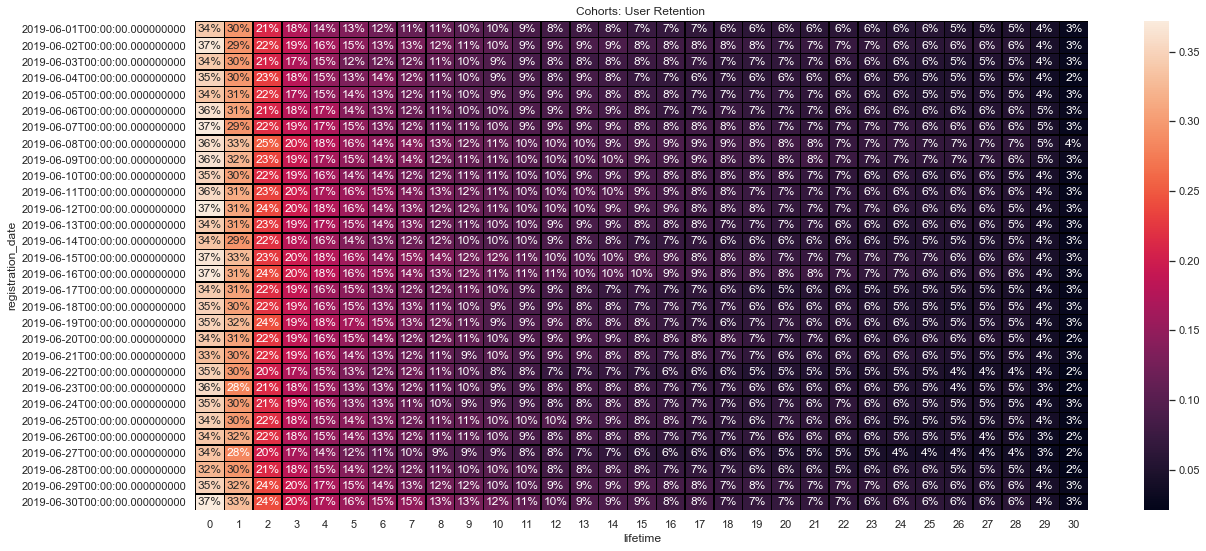

In [21]:
sns.set(style= 'white')
plt.figure(figsize=(20,9))
plt.title('Cohorts: User Retention ')
sns.heatmap(retention_pivot_june, mask=retention_pivot_june.isnull(), annot=True, fmt='.0%', linewidths = 0.5, linecolor='black')

### Рассчитаем для каждого дня lifetime усредненный Retention Rate

Теперь рассчитаем для каждого дня **lifetime** усредненный **Retention Rate** по всем когортам июня 2019 г. Результат запишем в датафрейм **retention_df_june**

In [22]:
retention_june = {}
for day_num in range(31):
    temp_retention_list = []
    retention_june[f'Day {day_num}'] = temp_retention_list
    for date_num in range(1,31):
        temp_retention_list.append(retention_pivot_june[day_num][f'2019-06-{date_num}'])
for days, retention_list in retention_june.items():
    retention_june[days] = sum(retention_list)/len(retention_list)
retention_df_june = pd.DataFrame(pd.Series(retention_june), columns=['retention_rate'])
retention_df_june.head(5)

,retention_rate
Day 0,0.350607
Day 1,0.305707
Day 2,0.223304
Day 3,0.186753
Day 4,0.161584


In [23]:
retention_df_june.iloc[0]

retention_rate    0.350607
Name: Day 0, dtype: float64

### Посторим график изменения среднего Retention Rate

Теперь посторим график изменения среднего **Retention Rate** в июне 2019 в зависимости от времени жизни пользователя.

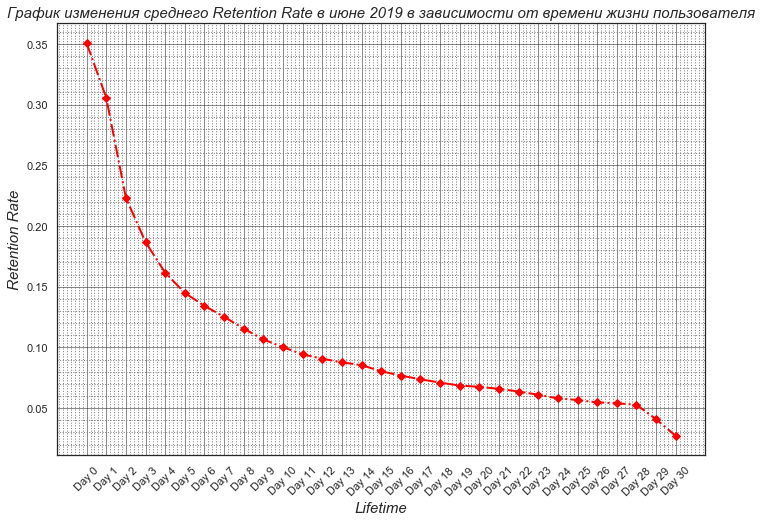

In [24]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
plt.xticks(rotation=45)
axes.set_title("График изменения среднего Retention Rate в июне 2019 в зависимости от времени жизни пользователя", fontsize=15, fontfamily = 'arial',
                fontstyle = 'oblique')
axes.set_xlabel('Lifetime', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.set_ylabel('Retention Rate', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.minorticks_on()
axes.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
axes.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
axes.plot(retention_df_june, linestyle = '-.', linewidth = 2, color = 'red', marker='D', markersize=5)

### Выводы на основе графика изменения Retention Rate.

In [25]:
print('Показатель на 1-й день (показатель краткосрочного удержания) - {:.2%}'.format(retention_df_june.iloc[1]['retention_rate']))
print('Показатель на 7-й день (показатель среднесрочного удержания) - {:.2%}'.format(retention_df_june.iloc[7]['retention_rate']))
print('Показатель на 30-й день (показатель долгосрочного удержания) - {:.2%}'.format(retention_df_june.iloc[30]['retention_rate']))

Показатель на 1-й день (показатель краткосрочного удержания) - 30.57%
Показатель на 7-й день (показатель среднесрочного удержания) - 12.52%
Показатель на 30-й день (показатель долгосрочного удержания) - 2.71%


Retention Rate это показатель который говорит нам о том насколько большой процент игроков возвращаются в игру в каждый конкретный день.
Посмотрим на график изменения среднего Retention Rate расчитанный в каждый день активности (lifetime). Как видно, график имеет форму кривой которая снижется с течением времени, стабилизация происходит на уровне 3-5%. Это говорит о том, что с течением времени все меньше и меньше игроков возвращаются в игру.
По стандартам игровой индустрии принято расчитывать Retention Rate на 1-й, 7-й и 30-й дни. Проанализируем данные показатели для нашего графика:
 1. *Показатель на 1-й день (показатель краткосрочного удержания)*. Малое значение показателя может говорить о наличии технических проблем с игрой (например непонятный геймплей, сложное обучение и т.п.) или возможно ошиблись с целевой аудиторией. В нашем случае данный показатель составляет около 30,5%, что начало игры хорошее и игрокам интересно продолжать играть в нее;
 2. *Показатель на 7-й день (показатель среднесрочного удержания)*. Показывает насколько интересно игрокам продолжать игру после 5-6 дней игры. В нашем случае данный показатель составляет около 12,5%, что говорит о том, что среднесрочные цели в нашей игре представлены не очень хорошо, и большая часть игроков поиграв несколько дней больше не хочет возвращаться в игру. На данном этапе рекомендуется проверить сюжетную линию игры. Насколько хорошо она выстроена? Также возможно стоит смягчить требования платы за игру (paywall), чтобы игроки продолжали играть в игру на не теряли к ней интереса в ожидании разблокировки контента;
 3. *Показатель на 30-й день (показатель долгосрочного удержания)*. Показывает насколько интересно игрокам оставаться в игре больше чем на 7 дней. Наш показатель составляет всего около 3 % ,что говорит о том что наш проект неуспешен и игроки теряют интерес к нашей игре. 
 
По результатам проведенного анализа можно сделать вывод что проект оказался не успешным: у игроков отсутствует мотивация и иинтерес играть в игру длительное время.

## Задача № 2. Расчитать ARPU и построить сводную таблицу изменения ARPU по когортам июня 2019 г. в зависимости от времени жизни.

### Считаем ARPU

Для того, чтобы посчитать ARPU, нам необходимы два датафрейма:
- датафрейм, в котором хранится информация об активных пользователях — это retention_table;
- датафрейм содержащий выручку по дням, разбитой на когорты это revenue.

Объединим данные датафрейма **revenue** с данными датафрейма **retention_table**. Но до этого следует изменить название колонки `date` на `activity_date` в датафрейме revenue. Это нужно для того, чтобы в дальнейшем объединять датафреймы по одинаковому названию колонок.


In [26]:
revenue_june=revenue_june.rename(columns={'date':'activity_date'})

После переименования можно объединить датафреймы в новый датафрейм retention_table_with_revenue_june:

In [27]:
retention_table_with_revenue_june =retention_table_june.merge(revenue_june, on=['registration_date','activity_date'], how='left')

Выведем первые пять строк нового датафрейма:

In [28]:
retention_table_with_revenue_june.head(5)

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.86290
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.73767
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.21720
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.27310
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.85913


Воспользуемся методом `info()` для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)

In [29]:
retention_table_with_revenue_june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   activity_date             930 non-null    datetime64[ns]
 1   registration_date         930 non-null    datetime64[ns]
 2   active_users_count        930 non-null    int64         
 3   registered_users_count    930 non-null    int64         
 4   retention_rate            930 non-null    float64       
 5   lifetime                  930 non-null    int32         
 6   users_count_with_revenue  833 non-null    float64       
 7   revenue                   833 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2)
memory usage: 61.8 KB


Датафрейм состоит из 930 строк и 8-ми столбцов. Рассмотрим каждый столбец подробнее:
    
- столбец **"activity_date"** (дата активности) имеет тип данных "`datetime64[ns]`";
- столбец **"registration_date"** (дата регистрации) имеет тип данных "`datetime64[ns]`";
- столбец **"active_users_count"** (количество зарегистрированных пользователей) имеет тип данных "`int64`";
- столбец **"registered_users_count"** (количество зарегистрированных пользователей) имеет тип данных "`int64`";
- столбец **"retention_rate"** имеет тип данных "`float64`";
- столбец **"lifetime"** меет тип данных "`int32`";
- столбец **"users_count_with_revenue"** (количество платящих пользователей) имеет тип данных "`float64`";
- столбец **"revenue"** (выручка) имеет тип данных "`float64`".

Видим, что после объединения у нас получились пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей.

C помощью функции `fillna()` произведем замену пропущенных значений на `0`:

In [30]:
for col in ['revenue','users_count_with_revenue']:
    retention_table_with_revenue_june[col] = retention_table_with_revenue_june[col].fillna(0)

Также преобразуем тип в столбце **"users_count_with_revenue"** в целочисленный:

In [31]:
retention_table_with_revenue_june['users_count_with_revenue'] = retention_table_with_revenue_june['users_count_with_revenue'].astype(int)

Рассчитаем показатель ARPU

In [32]:
retention_table_with_revenue_june['arpu'] = retention_table_with_revenue_june['revenue']/retention_table_with_revenue_june['active_users_count']
retention_table_with_revenue_june.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arpu
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082,1611.86290,0.976295
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928,317.73767,0.222350
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257,1305.21720,0.675229
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623,192.27310,0.188318
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008,554.85913,0.357974


In [33]:
arpu_pivot_june = retention_table_with_revenue_june.pivot_table(index='registration_date', columns='lifetime', values='arpu', aggfunc='sum')
arpu_pivot_june

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.976295,0.222350,0.188318,0.090474,0.056714,0.215960,0.686825,0.323515,0.000000,0.061368,...,0.058239,0.489988,0.210142,0.021039,0.043126,0.171568,0.769008,0.128948,0.027442,0.403106
2019-06-02,0.675229,0.357974,0.213421,0.126478,0.052536,0.213401,0.083839,0.283806,0.076447,0.215763,...,0.022516,0.022901,0.098184,0.050143,0.805545,0.065083,0.011850,0.054992,0.029301,0.596368
2019-06-03,0.717118,0.243213,0.043576,0.126431,0.093071,0.437531,0.074710,0.057345,0.060045,0.070161,...,0.178001,0.048150,0.322848,0.020926,0.044762,0.051014,0.000000,0.000000,0.034498,0.000000
2019-06-04,0.570125,0.280646,0.156370,0.249737,0.207717,0.313096,0.196367,0.107556,0.201097,0.535641,...,0.036031,0.218364,0.000000,0.035660,0.015292,0.050697,0.000000,0.360193,0.000000,0.050684
2019-06-05,0.678426,0.053987,0.524198,0.164261,0.200625,0.003562,0.066171,0.133804,0.119720,0.465517,...,0.077190,0.039368,0.065654,0.278710,0.040788,0.313618,0.131072,0.363810,0.193210,0.246925
2019-06-06,0.864331,0.156215,0.295781,0.367368,0.192799,0.059184,0.268415,0.059151,0.038135,0.145965,...,0.215097,0.031984,0.108534,0.018374,0.153387,0.303742,0.598917,0.103838,0.101862,0.000000
2019-06-07,0.488339,0.439911,0.276969,0.192135,0.182919,0.572636,0.119355,0.149861,0.071297,0.174512,...,0.131544,0.045359,0.000000,0.114296,0.283932,0.036038,0.125212,1.156721,0.075919,0.067893
2019-06-08,0.653629,0.415473,0.192291,0.268525,0.276235,0.334379,0.235960,0.051926,0.131110,0.264527,...,0.093310,0.000000,0.213927,0.000000,0.084135,0.142929,0.146605,0.000000,0.788145,0.078672
2019-06-09,0.910158,0.186660,0.207617,0.137292,0.441264,0.104410,0.246871,0.360654,0.083993,0.102356,...,0.062687,0.000000,0.028893,0.067952,0.018327,0.041019,0.183464,0.000000,0.016263,0.000000


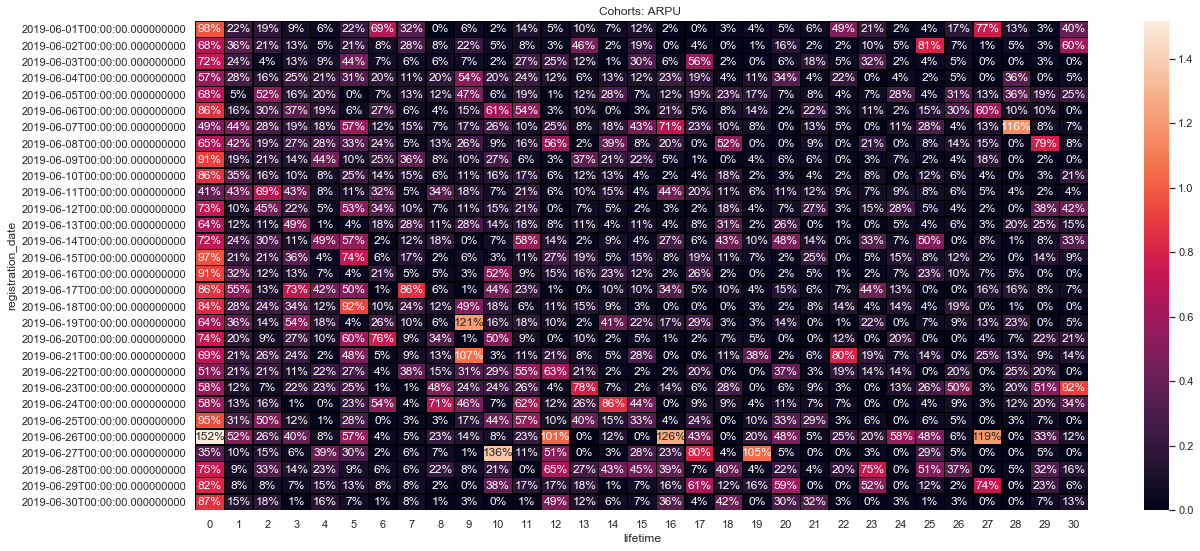

In [34]:
sns.set(style= 'white')
plt.figure(figsize=(20,9))
plt.title('Cohorts: ARPU ')
sns.heatmap(arpu_pivot_june, mask=arpu_pivot_june.isnull(), annot=True, fmt='.0%', linewidths = 0.5, linecolor='black')

## Задача № 3. Построить график по ARPU по когортам июня 2019 в нулевой день жизни и описать выводы.

Построим график по изменению ARPU по когортам июня 2019 в нулевой день жизни

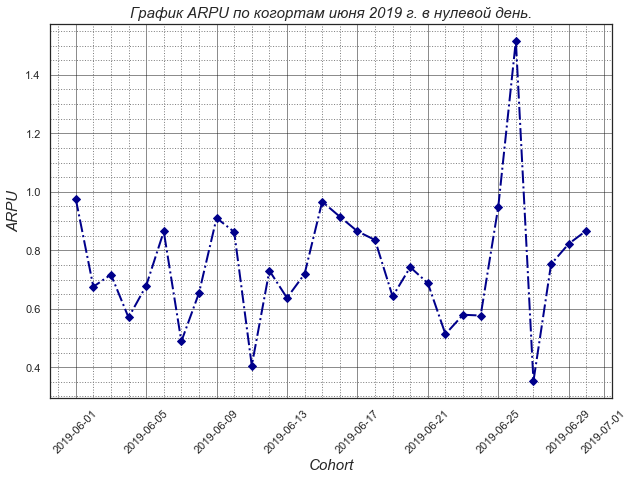

In [35]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure()
axes = fig.add_axes([0,0,1.3,1.3])
plt.xticks(rotation=45)
axes.set_title("График ARPU по когортам июня 2019 г. в нулевой день.", fontsize=15, fontfamily = 'arial',
                fontstyle = 'oblique')
axes.set_xlabel('Cohort', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.set_ylabel('ARPU', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.minorticks_on()
axes.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
axes.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
axes.plot(arpu_pivot_june[0], linestyle = '-.', linewidth = 2, color = 'darkblue', marker='D', markersize=5)

In [36]:
print(f'Максимальное значение показателя ARPU по когортам июня 2019 г. в нулевой день:     {float(arpu_pivot_june[0].max()):.2}')
print(f'Минимальное значение показателя ARPU по когортам июня 2019 г. в нулевой день:     {float(arpu_pivot_june[0].min()):.2}')
print(f'Среднее значение показателя ARPU по когортам июня 2019 г. в нулевой день:         {float(arpu_pivot_june[0].mean()):.2}')

Максимальное значение показателя ARPU по когортам июня 2019 г. в нулевой день:     1.5
Минимальное значение показателя ARPU по когортам июня 2019 г. в нулевой день:     0.35
Среднее значение показателя ARPU по когортам июня 2019 г. в нулевой день:         0.75


### Выводы по графику:

График иллюстрирует изменение ARPU по когортам в "нулевой" день. Мы видим циклическое изменение показателя, после небольшого падения следует небольшой рост. 

Максимальное значение ARPU фиксируется ближе к концу месяца 25.06.2019 г.. 
После максимального значения на следующий день ARPU снижается до минимального значения

## Задача № 4. Рассчитать усредненный ARPU по всем когортам июня 2019 г., построить график изменения ARPU и сделать выводы на основе графика.

Теперь рассчитаем для каждого дня **lifetime** усредненный **ARPU** по всем когортам июня 2019 г. Результат запишем в датафрейм **arpu_df_june**

In [37]:
arpu_june = {}
for day_num in range(31):
    l = []
    arpu_june[f'Day {day_num}'] = l
    for j in range(1,31):
        l.append(arpu_pivot_june[day_num][f'2019-06-{j}'])
for y, x in arpu_june.items():
    arpu_june[y] = sum(x)/len(x)
arpu_df_june = pd.DataFrame(pd.Series(arpu_june), columns=['arpu'])
arpu_df_june.head(5)

,arpu
Day 0,0.748998
Day 1,0.247612
Day 2,0.231220
Day 3,0.226372
Day 4,0.161454


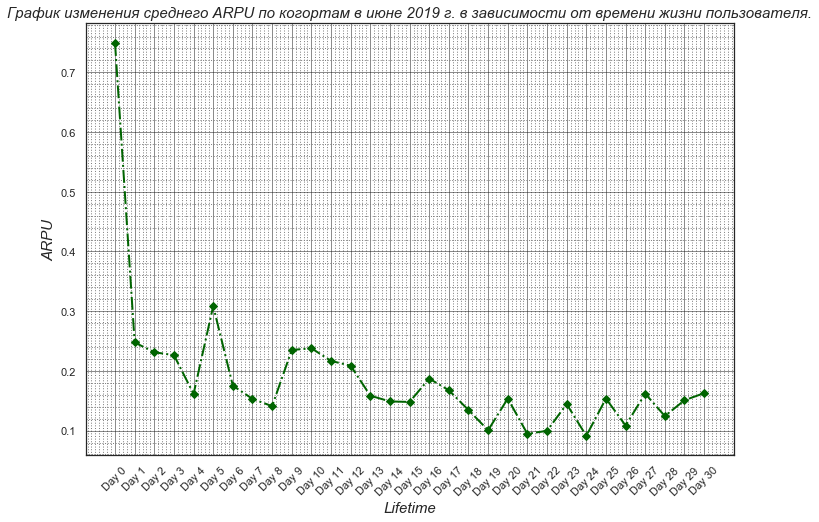

In [38]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
plt.xticks(rotation=45)
axes.set_title("График изменения среднего ARPU по когортам в июне 2019 г. в зависимости от времени жизни пользователя.", fontsize=15, fontfamily = 'arial',
                fontstyle = 'oblique')
axes.set_xlabel('Lifetime', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.set_ylabel('ARPU', fontsize=15, fontfamily = 'arial', fontstyle = 'oblique')
axes.minorticks_on()
axes.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
axes.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
axes.plot(arpu_df_june, linestyle = '-.', linewidth = 2, color = 'darkgreen', marker='D', markersize=5)

In [39]:
print(f'Максимальное значение усредненного ARPU по всем когортам июня 2019 г.:    {float(arpu_df_june.max()):.2}')
print(f'Минимальное значение усредненного ARPU по всем когортам июня 2019 г.:     {float(arpu_df_june.min()):.2}')
print(f'Среднее значение усредненного ARPU по всем когортам июня 2019 г.:         {float(arpu_df_june.mean()):.2}')

Максимальное значение усредненного ARPU по всем когортам июня 2019 г.:    0.75
Минимальное значение усредненного ARPU по всем когортам июня 2019 г.:     0.091
Среднее значение усредненного ARPU по всем когортам июня 2019 г.:         0.19


График отображает изменение среднего ARPU по когортам июня в зависимости от времени жизни пользователя. График имеет нисходящий тренд, т.е. ARPU снижается с увеличением времени жизни пользователя. 

Максимальное значение ARPU фиксируется в нулевой день жизни пользователя. После следует большое падение, но к пятому дню наблюдается небольшой рост (второе по величине значение после максимального). После двенадцатого дня значение показателя стабилизируется в коридоре от 0,1 до 0,2.

На основании графика можно сделать следующие выводы:
1. Средний показатель ARPU снижается с увеличением времени жизни пользователя. Значит максимальную прибыль мы получаем в нулевой день жизни пользователя. Далее показатель идет на спад, следовательно снижается наша выручка, и как следствие - прибыль.
2. Одной из возможных причин снижения, является снижение показателя Retention Rate который мы анализировали ранее. Чем хуже игра удерживает игроков, тем меньше времени пользователи будут играть в игру. Видимо это повлияло на выручку.